<a href="https://colab.research.google.com/github/MonitSharma/Learn-Machine-Learning-with-Me/blob/main/Hello_World_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A First Shot at Deep Learning with PyTorch

Here we are gonna take baby steps into the world of deep learning using PyTorch. There are a ton of notebooks out there that teach you the fundamentals of deep learning , so here it will be just a basic introduction at a very high level. It targets at beginners and can be used as a review by advanced developers.



# Importing Libraries

Like with any other programming exercise, the first step is to import the necesaary libraries. As we are going to be using Google Colab , we need to install the essential libraries

In [1]:
## The usual imports
import torch
import torch.nn as nn

## print out the pytorch version used
print(torch.__version__)

1.12.1+cu113


## The Neural Network

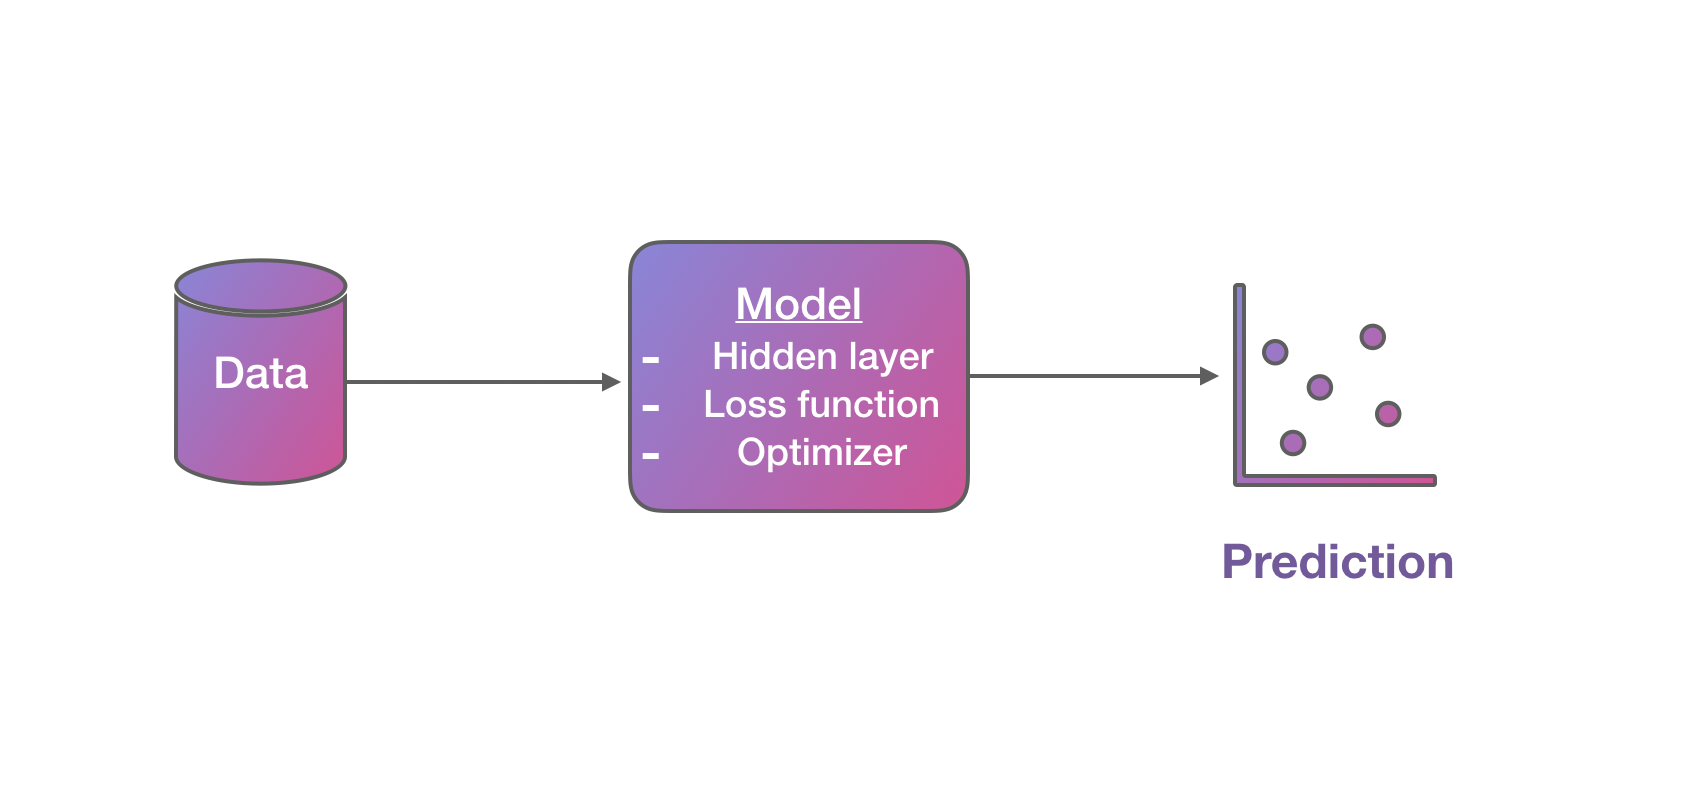




Befor Building and training a neural network the first step is to process and prepare the data. (add data cleaning link) . 

In this case, we will be using a syntetic data , so we won't use real world data, that generally requires extensive cleaning.

We are going to use the following input and output pairs converted to tensors, which is how data is typically represented in the world of deep learning. The $x$ values represent the input of dimenstions `(6,1)` and the $y$ values represent the output of similar dimension.

The objective of this neural network model that we are going to build and train is to automatically learn patterns that better characterize the relationship between the `x` and `y` values. Essentially the model learns the relationship that exists between inputs and outputs which can then be used to predict the corresponding `y` values for any given input `x`.

In [2]:
## our data in tensor form
x = torch.tensor([[-1.0],  [0.0], [1.0], [2.0], [3.0], [4.0]], dtype=torch.float)
y = torch.tensor([[-3.0], [-1.0], [1.0], [3.0], [5.0], [7.0]], dtype=torch.float)

In [3]:
## print size of the input tensor
x.size()

torch.Size([6, 1])

## The Neural Network Components

Let's define ⁉

### Model
Typically , when building a neural network mdoel, we define the layers and weights which form the basic components of the model. Below we show an example of how to define a hidden layer named `layer1` with size `(1,1)`.
We won't explain weights right now, and allow the built in functions of PyTorch to take care of it.

So, `nn,Linear(...)` function applies a linear transformation $(y = xA^T + b)$ to the data that was provided as its input. We ignore the bias for now by setting `bias=False`

In [4]:
## Neural network with 1 hidden layer
layer1 = nn.Linear(1,1, bias=False)
model = nn.Sequential(layer1)

### Loss and Optimizer

The Loss function, `nn.MSELoss()` is in charge of letting the model know how good it has learned the relationship between the input and output. The optimizer (in this case `SGD`) primary role is to minimize or lower that loss value as it tunes its weights.

In [5]:
## loss function
criterion = nn.MSELoss()

## optimizer algorithm
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Training the Neural Network Model
We have all the components we need to train our model. Below is the code used to train our model. 

In simple terms, we train the model by feeding it the input and output pairs for a couple of rounds (i.e., `epoch`). After a series of forward and backward steps, the model somewhat learns the relationship between x and y values. This is notable by the decrease in the computed `loss`. 

In [6]:
## training
for ITER in range(150):
    model = model.train()

    ## forward
    output = model(x)
    loss = criterion(output, y)
    optimizer.zero_grad()

    ## backward + update model params 
    loss.backward()
    optimizer.step()

    model.eval()
    print('Epoch: %d | Loss: %.4f' %(ITER, loss.detach().item()))

Epoch: 0 | Loss: 12.3469
Epoch: 1 | Loss: 10.0376
Epoch: 2 | Loss: 8.1810
Epoch: 3 | Loss: 6.6883
Epoch: 4 | Loss: 5.4881
Epoch: 5 | Loss: 4.5231
Epoch: 6 | Loss: 3.7473
Epoch: 7 | Loss: 3.1235
Epoch: 8 | Loss: 2.6220
Epoch: 9 | Loss: 2.2187
Epoch: 10 | Loss: 1.8945
Epoch: 11 | Loss: 1.6339
Epoch: 12 | Loss: 1.4243
Epoch: 13 | Loss: 1.2558
Epoch: 14 | Loss: 1.1203
Epoch: 15 | Loss: 1.0114
Epoch: 16 | Loss: 0.9238
Epoch: 17 | Loss: 0.8534
Epoch: 18 | Loss: 0.7968
Epoch: 19 | Loss: 0.7512
Epoch: 20 | Loss: 0.7146
Epoch: 21 | Loss: 0.6852
Epoch: 22 | Loss: 0.6616
Epoch: 23 | Loss: 0.6425
Epoch: 24 | Loss: 0.6273
Epoch: 25 | Loss: 0.6150
Epoch: 26 | Loss: 0.6051
Epoch: 27 | Loss: 0.5971
Epoch: 28 | Loss: 0.5907
Epoch: 29 | Loss: 0.5856
Epoch: 30 | Loss: 0.5815
Epoch: 31 | Loss: 0.5781
Epoch: 32 | Loss: 0.5755
Epoch: 33 | Loss: 0.5733
Epoch: 34 | Loss: 0.5716
Epoch: 35 | Loss: 0.5702
Epoch: 36 | Loss: 0.5691
Epoch: 37 | Loss: 0.5682
Epoch: 38 | Loss: 0.5675
Epoch: 39 | Loss: 0.5669
Epoch: 4

## Testing the Model
After training the model we have the ability to test the model predictive capability by passing it an input. Below is a simple example of how you could achieve this with our model. 

In [7]:
## test the model
sample = torch.tensor([10.0], dtype=torch.float)
predicted = model(sample)
print(predicted.detach().item())

17.096769332885742


## Summary
Here we learned how to train a simple neural network using PyTorch. Also learned about the basic component that make up a neural network model such as linear transformation , optimizer, and loss function. We then trained the model and tested its predictive capabilities. 